In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [9]:
# load dataframe
df_TCRA = pd.read_csv("../summary_data/150bp/all_tools_TRA_diversity.csv")
df_TCRA.columns = ['Sample', 'TRA_shannon_index','TRA_clonotype_count','TRA_normalized_shannon_index','tool','sample_type']

df_TCRB = pd.read_csv("../summary_data/150bp/all_tools_TRB_diversity.csv")
df_TCRB = df_TCRB[['Sample','shannon_index_tool','clonotype_count_tool','normalized_shannon_index_tool','tool','sample_type']]
df_TCRB.columns = ['Sample', 'TRB_shannon_index','TRB_clonotype_count','TRB_normalized_shannon_index','tool','sample_type']

In [10]:
# Compare TCRB and TCRA diversity 

df = pd.merge(df_TCRA, df_TCRB, how='outer', on=['Sample','tool','sample_type']).fillna(0)
df

,Sample,TRA_shannon_index,TRA_clonotype_count,TRA_normalized_shannon_index,tool,sample_type,TRB_shannon_index,TRB_clonotype_count,TRB_normalized_shannon_index
0,CMT-baseline1C_CAGATC,3.092193,23,0.986190,MIXCR,melanoma,3.438804,34.0,0.975171
1,CMT-baseline1C_CAGATC,4.125943,65,0.988395,IMREP,melanoma,4.406335,92.0,0.974467
2,CMT-baseline1C_CAGATC,4.938231,160,0.973017,TRUST4,melanoma,5.024401,200.0,0.948301
3,ESO1-sorted-T-cells_S13_L007,0.535771,2215,0.069553,MIXCR,PBMC,0.829164,2592.0,0.105489
4,ESO1-sorted-T-cells_S13_L007,0.824119,2953,0.103136,IMREP,PBMC,1.163479,3682.0,0.141694
5,ESO1-sorted-T-cells_S13_L007,0.958934,3427,0.117813,TRUST4,PBMC,1.165598,4154.0,0.139897
6,HM-baseline1C_CGATGT,0.000000,1,0.000000,MIXCR,melanoma,0.000000,0.0,0.000000
7,HM-baseline1C_CGATGT,0.764754,3,0.696109,IMREP,melanoma,0.000000,1.0,0.000000
8,HM-baseline1C_CGATGT,1.078992,3,0.982141,TRUST4,melanoma,0.970585,4.0,0.700129
9,INY1-sorted-T-cells_S14_L007,0.780964,1414,0.107657,MIXCR,PBMC,0.988740,1565.0,0.134419


Normalized SDI comparison

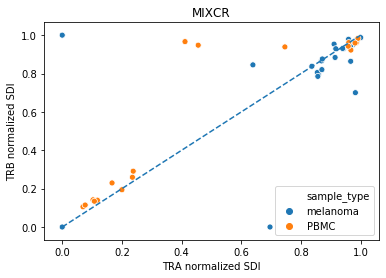

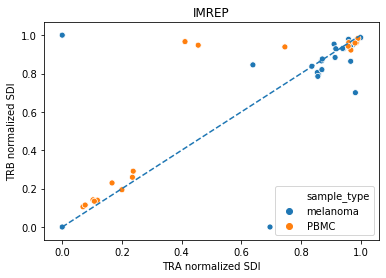

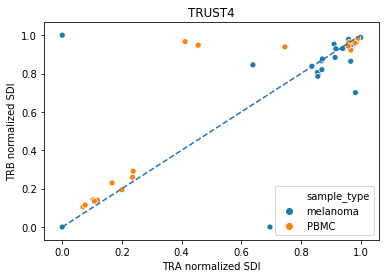

In [11]:
tools = ['MIXCR','IMREP','TRUST4']

for tool in tools:

    ax = sns.scatterplot(x='TRA_normalized_shannon_index',y='TRB_normalized_shannon_index', hue='sample_type', data=df)
    ax.set(title = tool)
    ax.plot([0,1],[0,1],linestyle='dashed')
    ax.set_xlabel('TRA normalized SDI',fontsize=10)
    ax.set_ylabel('TRB normalized SDI',fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.show()

In [12]:
# Calculate the Pearson correlation 

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = df.loc[(df['tool'] == tool)]
    print(tool + ' Pearson correlation cofficient:' + str(stats.pearsonr(correlation['TRA_normalized_shannon_index'], correlation['TRB_normalized_shannon_index'])))

MIXCR Pearson correlation cofficient:(0.7484639025305777, 0.0013275274342819787)
IMREP Pearson correlation cofficient:(0.8455460892696705, 7.170486745798637e-05)
TRUST4 Pearson correlation cofficient:(0.8714390756137169, 2.322475351723582e-05)
